In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image as Im
import glob
import json
from collections import defaultdict,OrderedDict
import random

In [2]:
youth,student,adult, elder=[],[],[],[]
label=['youth','student','adult','elder']
index={'youth':0, 'student':1,'adult':2, 'elder':3}

In [3]:
UTKface=glob.glob('data/UTKFace/imgs/*.jpg')
print(len(UTKface))
print(UTKface[0])
print(UTKface[0].split('_'))
print(UTKface[0].split('_')[0].split('/')[-1])

23708
data/UTKFace/imgs/26_0_2_20170116181100669.jpg.chip.jpg
['data/UTKFace/imgs/26', '0', '2', '20170116181100669.jpg.chip.jpg']
26


In [4]:
ratio=[]
for img in UTKface:
    age=int(img.split('_')[0].split('/')[-1])
    
    if 0<= age <= 15:
        youth.append(img)
    elif 15< age <=28:
        student.append(img)
    elif 28< age <= 50:
        adult.append(img)
    else:
        elder.append(img)
print(f'youth:{len(youth)}')
print(f'student:{len(student)}')
print(f'adult:{len(adult)}')
print(f'elder:{len(elder)}')
ratio.append(len(youth))
ratio.append(len(student))
ratio.append(len(adult))
ratio.append(len(elder))
print(ratio)

youth:3828
student:7539
adult:7733
elder:4608
[3828, 7539, 7733, 4608]


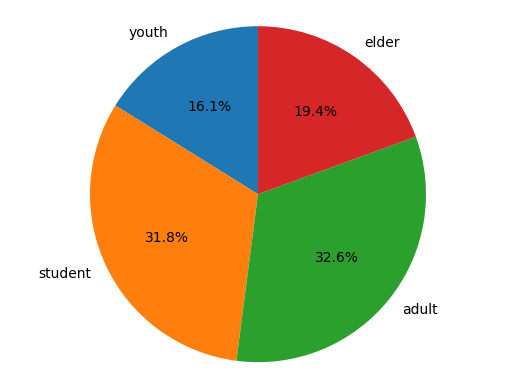

In [5]:
fig1,ax1=plt.subplots()
ax1.pie(ratio,labels=label,autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.show()

데이터셋 추가

In [6]:
ratio=[]
root='data/face_age/'
face_age=os.listdir('data/face_age')
for age_path in face_age:

    if age_path[-1]=='n':  # json 파일이면 넘어간다
        continue

    img_path=root+age_path
    imgs=glob.glob(img_path+'/*.png')
    age=int(age_path)
    
    if 0<=age<=15:
        youth.extend(imgs)
    elif 15<age<=28:
        student.extend(imgs)
    elif 28<age<=50:
        adult.extend(imgs)
    else:
        elder.extend(imgs)
    
print(f'youth:{len(youth)}')
print(f'student:{len(student)}')
print(f'adult:{len(adult)}')
print(f'elder:{len(elder)}')
ratio.append(len(youth))
ratio.append(len(student))
ratio.append(len(adult))
ratio.append(len(elder))
print(ratio)

youth:7438
student:9460
adult:9697
elder:6891
[7438, 9460, 9697, 6891]


In [7]:
print(sum(ratio))

33486


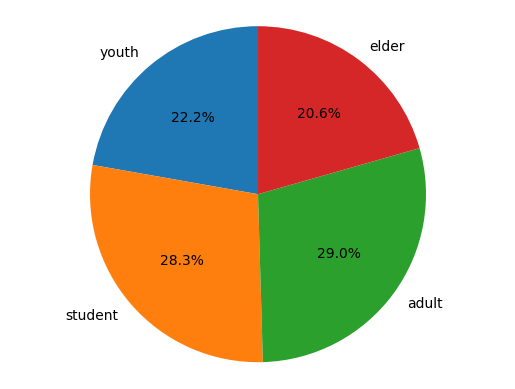

In [8]:
fig1,ax1=plt.subplots()
ax1.pie(ratio,labels=label,autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.show()

In [9]:
val_ratio,test_ratio=[],[]
for ra in ratio:
    val_ratio.append(int(ra*0.2))
print(val_ratio)
for ra in val_ratio:
    test_ratio.append(int(ra/2))
print(test_ratio)
imgs=[youth,student,adult,elder]

[1487, 1892, 1939, 1378]
[743, 946, 969, 689]


In [10]:
train_imgs=[]
val_imgs=[]
test_imgs=[]
for i in range(4):
    train=imgs[i][val_ratio[i]:]
    val=imgs[i][test_ratio[i]:val_ratio[i]]
    test=imgs[i][:test_ratio[i]]
    
    train_imgs.append(train)
    val_imgs.append(val)
    test_imgs.append(test)
    print(f'{label[i]}: train:{len(train)}, val:{len(val)} test:{len(test)}')
print(len(train_imgs),len(val_imgs),len(test_imgs))
    

youth: train:5951, val:744 test:743
student: train:7568, val:946 test:946
adult: train:7758, val:970 test:969
elder: train:5513, val:689 test:689
4 4 4


In [12]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)

In [21]:
sum=0

In [22]:
f=open('data/face_age/train.json','w')
l=[]
for i in range(len(train_imgs)):
    for img in train_imgs[i]:
        d={'img':img,
           'label':label[i]}
        l.append(d)
l=l*3
sum+=len(l)
json.dump(l,f,indent='\t',cls=NpEncoder)
f.close()

f=open('data/face_age/val.json','w')
l=[]
for i in range(len(val_imgs)):
    for img in val_imgs[i]:
        d={'img':img,
           'label':label[i]}
        l.append(d)
l=l*3
json.dump(l,f,indent='\t',cls=NpEncoder)
f.close()
sum+=len(l)
f=open('data/face_age/test.json','w')
l=[]
for i in range(len(test_imgs)):
    for img in test_imgs[i]:
        d={'img':img,
           'label':label[i]}
        l.append(d)
l=l*3
sum+=len(l)
json.dump(l,f,indent='\t',cls=NpEncoder)
f.close()

In [23]:
print(sum)

100458
